# Find out patients with sufficants mesures' count

In [3]:
import pandas as pd

In [4]:
dfTargetPatients = pd.read_csv("./tmp/icu_target.csv")
dfTargetPatients.columns

Index(['Unnamed: 0', 'subject_id', 'hadm_id', 'stay_id', 'caregiver_id',
       'charttime', 'storetime', 'itemid', 'value', 'valuenum', 'valueuom',
       'warning', 'is_akd'],
      dtype='object')

In [5]:
droppingColumnsName = ["Unnamed: 0", "subject_id", "caregiver_id", "storetime", "value", "valueuom", "warning"]
droppingColumns = [col for col in droppingColumnsName if col in dfTargetPatients.columns]

dfTargetPatients = dfTargetPatients.drop(droppingColumns, axis=1)
dfTargetPatients["charttime"] = pd.to_datetime(dfTargetPatients["charttime"])
dfTargetPatients

,hadm_id,stay_id,charttime,itemid,valuenum,is_akd
0,25085565,32496174,2186-09-15 20:00:00,220615,0.8,False
1,25085565,32496174,2186-09-16 04:03:00,220615,0.7,False
2,21759936,35024147,2140-10-03 11:37:00,220615,1.1,False
3,21759936,35024147,2140-10-03 14:17:00,220615,1.0,False
4,21759936,35024147,2140-10-03 16:29:00,220615,0.9,False
...,...,...,...,...,...,...
8861,25744818,36075953,2149-01-09 03:13:00,220615,0.7,False
8862,25744818,36075953,2149-01-09 07:58:00,220615,0.6,False
8863,25744818,36075953,2149-01-09 13:53:00,220615,0.6,False
8864,25744818,36075953,2149-01-09 19:39:00,220615,0.8,False


In [7]:
dfsTimeDelta = []

dfGroupedTargetPatients = dfTargetPatients.groupby(by="stay_id")
for groupId, groupData in dfGroupedTargetPatients:
    if len(groupData) < 5: 
        continue
    
    groupDataSorted = groupData.sort_values(by="charttime")
    
    # get indexes of is_akd in sorted group
    if (groupDataSorted.columns.__contains__("is_akd")):
        isAkdIndexes = groupDataSorted[groupDataSorted["is_akd"]].index
    else:
        isAkdIndexes = []
    if (len(isAkdIndexes) > 0):
        # drop all is_akd from the first akd
        firstAkdIndex = isAkdIndexes[0]
        groupDataSortedNoAKD = groupDataSorted.drop(index=range(firstAkdIndex, len(groupDataSorted)))
        # mark will akd 
        # groupDataSortedNoAKD["will_akd"][len(groupDataSortedNoAKD) - 1] = True
        pass
    else:
        groupDataSortedNoAKD = groupDataSorted
        pass
    groupDataSortedNoAKD["time_delta"] = groupDataSortedNoAKD["charttime"].diff()
    dfsTimeDelta.append(groupDataSortedNoAKD)
    pass
dfTimeDelta = pd.concat(dfsTimeDelta)
dfTimeDelta

,hadm_id,stay_id,charttime,itemid,valuenum,is_akd,time_delta
7999,20906073,30006067,2161-04-14 09:00:00,220615,1.2,True,NaT
8000,20906073,30006067,2161-04-14 13:00:00,220615,1.0,False,0 days 04:00:00
8001,20906073,30006067,2161-04-14 16:47:00,220615,0.9,False,0 days 03:47:00
8002,20906073,30006067,2161-04-14 20:27:00,220615,0.8,False,0 days 03:40:00
8003,20906073,30006067,2161-04-15 05:15:00,220615,0.7,False,0 days 08:48:00
...,...,...,...,...,...,...,...
5781,28982559,39981751,2201-06-29 22:00:00,220615,0.6,False,0 days 06:00:00
5782,28982559,39981751,2201-06-30 04:00:00,220615,0.5,False,0 days 06:00:00
5783,28982559,39981751,2201-07-01 05:24:00,220615,0.5,False,1 days 01:24:00
5784,28982559,39981751,2201-07-01 17:35:00,220615,0.5,False,0 days 12:11:00


In [8]:
print("Length:" + str(len(dfTimeDelta)))
print("NaN:" + str(dfTimeDelta["time_delta"].isna().sum()))

Length:7519
NaN:745


In [9]:
dfTimeDelta.dropna(subset=["time_delta"], inplace=True)
dfTimeDelta

,hadm_id,stay_id,charttime,itemid,valuenum,is_akd,time_delta
8000,20906073,30006067,2161-04-14 13:00:00,220615,1.0,False,0 days 04:00:00
8001,20906073,30006067,2161-04-14 16:47:00,220615,0.9,False,0 days 03:47:00
8002,20906073,30006067,2161-04-14 20:27:00,220615,0.8,False,0 days 03:40:00
8003,20906073,30006067,2161-04-15 05:15:00,220615,0.7,False,0 days 08:48:00
7936,27978004,30007216,2191-03-10 17:03:00,220615,1.2,True,0 days 03:08:00
...,...,...,...,...,...,...,...
5781,28982559,39981751,2201-06-29 22:00:00,220615,0.6,False,0 days 06:00:00
5782,28982559,39981751,2201-06-30 04:00:00,220615,0.5,False,0 days 06:00:00
5783,28982559,39981751,2201-07-01 05:24:00,220615,0.5,False,1 days 01:24:00
5784,28982559,39981751,2201-07-01 17:35:00,220615,0.5,False,0 days 12:11:00


<Axes: ylabel='Frequency'>

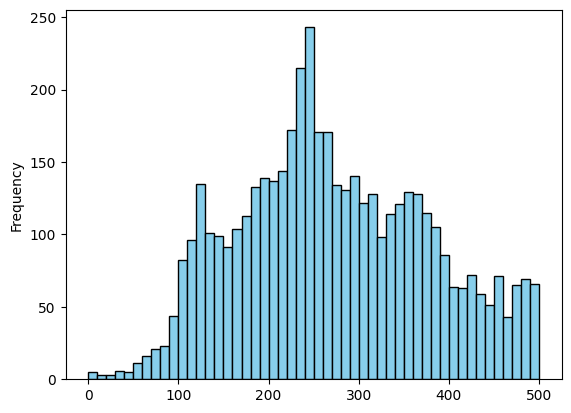

In [10]:
import numpy as np

(dfTimeDelta["time_delta"].astype("timedelta64[s]") / np.timedelta64(1, "m"))\
    .plot.hist(bins=50, color="skyblue", edgecolor="black", range=(0,500))

In [11]:
dfTimeDelta["time_delta"].describe()

count                         6774
mean     0 days 07:39:44.614703277
std      0 days 06:12:30.540866016
min                0 days 00:02:00
25%                0 days 03:50:00
50%                0 days 05:43:00
75%                0 days 09:50:00
max                4 days 13:56:00
Name: time_delta, dtype: object

In [11]:
dfPatientsMesurementsCount = dfTargetPatients.groupby(by="stay_id").size().reset_index(name='Count')
dfPatientsMesurementsCount["Count"].describe()
# there are 1205 group (count)

count    1205.000000
mean        7.357676
std         7.356424
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Count, dtype: float64

<Axes: ylabel='Frequency'>

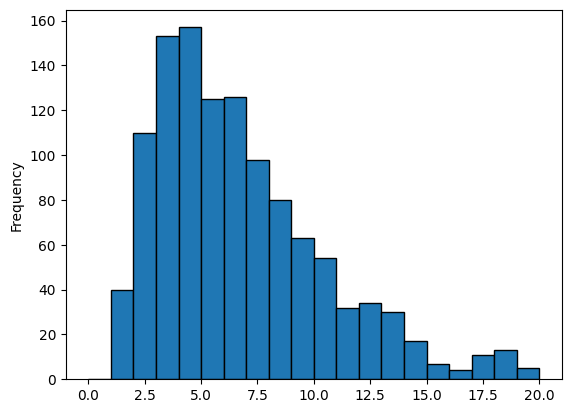

In [20]:
dfPatientsMesurementsCount["Count"].plot.hist(bins=20, edgecolor="black", range=(0,20))

Drop some short admission

In [28]:
print("Original length:", dfTargetPatients.__len__())
for i in [3,4,5,6,7]:
    print(i, dfPatientsMesurementsCount[dfPatientsMesurementsCount["Count"] > i].sum()["Count"])

Original length: 8866
3 8147
4 7519
5 6894
6 6138
7 5452


In [31]:
dfTargetPatients = pd.read_csv("./tmp/chartevent_plt.csv")
droppingColumnsName = ["Unnamed: 0", "subject_id", "caregiver_id", "storetime", "value", "valueuom", "warning"]
droppingColumns = [col for col in droppingColumnsName if col in dfTargetPatients.columns]

dfTargetPatients = dfTargetPatients.drop(droppingColumns, axis=1)
dfTargetPatients["charttime"] = pd.to_datetime(dfTargetPatients["charttime"])
# dfTargetPatients

dfPatientsMesurementsCount = dfTargetPatients.groupby(by="stay_id").size().reset_index(name='Count')
print("Original length:", dfTargetPatients.__len__())
for i in [3,4,5,6,7]:
    print(i, dfPatientsMesurementsCount[dfPatientsMesurementsCount["Count"] > i].sum()["Count"])

Original length: 388028
3 312684
4 283036
5 258031
6 236545
7 217848


In [33]:
dfTargetPatients = pd.read_csv("./tmp/chartevent_weight.csv")
droppingColumnsName = ["Unnamed: 0", "subject_id", "caregiver_id", "storetime", "value", "valueuom", "warning"]
droppingColumns = [col for col in droppingColumnsName if col in dfTargetPatients.columns]

dfTargetPatients = dfTargetPatients.drop(droppingColumns, axis=1)
dfTargetPatients["charttime"] = pd.to_datetime(dfTargetPatients["charttime"])
# dfTargetPatients

dfPatientsMesurementsCount = dfTargetPatients.groupby(by="stay_id").size().reset_index(name='Count')
print("Original length:", dfTargetPatients.__len__())
for i in [3,4,5,6,7]:
    print("Patients with more than", i, "mesures:", dfPatientsMesurementsCount[dfPatientsMesurementsCount["Count"] > i].sum()["Count"])

Original length: 202491
3 155782
4 147718
5 141728
6 136526
7 132333


In [37]:
df1 = pd.read_csv("./tmp/glucose_serum.csv")
df2 = pd.read_csv("./tmp/glucose_stick.csv")
df3 = pd.read_csv("./tmp/glucose_whole_blood.csv")

dfTargetPatients = pd.concat([df1, df2, df3])
droppingColumnsName = ["Unnamed: 0", "subject_id", "caregiver_id", "storetime", "value", "valueuom", "warning"]
droppingColumns = [col for col in droppingColumnsName if col in dfTargetPatients.columns]

dfTargetPatients = dfTargetPatients.drop(droppingColumns, axis=1)
dfTargetPatients["charttime"] = pd.to_datetime(dfTargetPatients["charttime"])
# dfTargetPatients

dfPatientsMesurementsCount = dfTargetPatients.groupby(by="stay_id").size().reset_index(name='Count')
print("Original length:", dfTargetPatients.__len__())
for i in [3,4,5,6,7]:
    print(i, dfPatientsMesurementsCount[dfPatientsMesurementsCount["Count"] > i].sum()["Count"])

Original length: 47341
3 47333
4 47301
5 47261
6 47213
7 47129


## find top frequent mesures 

In [8]:
from constants import MIMIC_PATH, TEMP_PATH
import pandas as pd


targetPatients = set(pd.read_csv(TEMP_PATH / "icu_target.csv", usecols=["stay_id"])["stay_id"])
        
itemidCounts = pd.Series(dtype=int)
for chunk in pd.read_csv(MIMIC_PATH / "icu" / "chartevents.csv", chunksize=10000):
    chunk = chunk.iloc[:, 1:]
    filteredChunk = chunk[chunk["stay_id"].isin(targetPatients)]
    chunkItemidCounts = filteredChunk["itemid"].value_counts()
    itemidCounts = itemidCounts.add(chunkItemidCounts,fill_value=0)
    pass
topItemidCounts = itemidCounts.nlargest(10)

top_itemids_with_counts = pd.DataFrame({'itemid': topItemidCounts.index, 'count': topItemidCounts.values})
print("Top 10 itemid counts for interested stay_id:")
print(top_itemids_with_counts)


Top 10 itemid counts for interested stay_id:
   itemid     count
0  227969  107427.0
1  220045   83859.0
2  220210   83054.0
3  220277   80576.0
4  220048   77743.0
5  224650   70393.0
6  220179   59743.0
7  220180   59737.0
8  220181   59700.0
9  225664   39598.0
